# Libraries

In [32]:
# plot the graphs inline
%matplotlib inline

In [33]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Introduction

This week we are going to work with some text data. In this folder, you should a text file called 'fullpapers.txt'. This file was generated by converting the proceedings of the EDM (Educational Data Mining) conference of 2018. You can find the proceedings here: http://educationaldatamining.org/EDM2017/proc_files/fullpapers.pdf
We are going to explore the different terms that are used by authors of the papers in this conference, which will require some data cleaning!

# Import the data

Our goal is compare the different papers in terms of the vocabulary used. 
* open the pdf of the proceedings (fullpapers.pdf); 
* open the txt of the proceedigs (fullpapers.txt)

1) we want to split the data into different papers. Brainstorm a few ideas on how to do that:
* We could use headers like 'abstract' to separate out each paper...although then if people refer to the abstract again it could be a problem.
* We could use formatting if each paper is formatted itself
* We could do it manually (although try to avoid this). 

In [34]:
# 2) First we are going to read the fullpapers.txt file 
# and assign its content to a variable called "data"
# hint: https://stackoverflow.com/questions/3758147/easiest-way-to-read-write-a-files-content-in-python
s = open('fullpapers.txt', 'r').read()
s


'\x0cZone out no more: Mitigating mind wandering during\ncomputerized reading\nSidney K. D’Mello, Caitlin Mills, Robert Bixler, & Nigel Bosch\nUniversity of Notre Dame\n118 Haggar Hall\nNotre Dame, IN 46556, USA\nsdmello@nd.edu\n\nABSTRACT\nMind wandering, defined as shifts in attention from task-related\nprocessing to task-unrelated thoughts, is a ubiquitous\nphenomenon that has a negative influence on performance and\nproductivity in many contexts, including learning. We propose\nthat next-generation learning technologies should have some\nmechanism to detect and respond to mind wandering in real-time.\nTowards this end, we developed a technology that automatically\ndetects mind wandering from eye-gaze during learning from\ninstructional texts. When mind wandering is detected, the\ntechnology intervenes by posing just-in-time questions and\nencouraging re-reading as needed. After multiple rounds of\niterative refinement, we summatively compared the technology to\na yoked-control in a

In [35]:
# 3) To facilitate data processing, we want to split this file
# into different pages. Create a list called "pages" that 
# stores the text presented on each page of the pdf
import re
pages = re.split('Proceedings of the 10th International Conference on Educational Data Mining',s)


In [36]:
# 4) because we don't want to deal with upper case / lower case issues
# we are going to lower case everything:
pages = [item.lower() for item in pages]

5) Now we would like to join pages if they below to the same paper. Can you think of keywords we could like for to decided if the current page is starting a new paper? Write down two ideas:
1. Abstract - searching for all caps abstract
2. 1. Introduction

In [37]:
# 6) create a new list called "papers", which is going to contain 
# all the papers we have. Iterate through all the pages and 
# add a new element to the list when you have a full paper

papers = []
current_paper = ''
for page in pages:
    if 'introduction' and 'abstract' and '1. introduction' in page:
            papers.append(current_paper)
            current_paper = '' 
            current_paper = current_paper + page
    else: 
        #del(page[2:4])
        current_paper = current_paper + page
del papers[0]
papers[0]


# iterate through the pages and add each paper to the list "papers"

"\x0czone out no more: mitigating mind wandering during\ncomputerized reading\nsidney k. d’mello, caitlin mills, robert bixler, & nigel bosch\nuniversity of notre dame\n118 haggar hall\nnotre dame, in 46556, usa\nsdmello@nd.edu\n\nabstract\nmind wandering, defined as shifts in attention from task-related\nprocessing to task-unrelated thoughts, is a ubiquitous\nphenomenon that has a negative influence on performance and\nproductivity in many contexts, including learning. we propose\nthat next-generation learning technologies should have some\nmechanism to detect and respond to mind wandering in real-time.\ntowards this end, we developed a technology that automatically\ndetects mind wandering from eye-gaze during learning from\ninstructional texts. when mind wandering is detected, the\ntechnology intervenes by posing just-in-time questions and\nencouraging re-reading as needed. after multiple rounds of\niterative refinement, we summatively compared the technology to\na yoked-control in a

In [52]:
# 7) print how many files you have in the "papers" list:
len(papers)

12

In [53]:
# 8) print the content of the first two paper to make sure it worked
# (only print the first 300 characters)
for paper in papers[0:5]:
    print(str(paper)[0:300])


zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
process


15

measuring similarity of educational items using data on
learners’ performance
jiří řihák

faculty of informatics
masaryk university
brno, czech republic

thran@mail.muni.cz
abstract
educational systems typically contain a large pool of items
(questions, problems). using data mining techniqu


23

adaptive sequential recommendation for discussion
forums on moocs using context trees
fei mi
boi faltings
artificial intelligence lab
école polytechnique fédérale de lausanne, switzerland
firstname.lastname@epfl.ch
abstract

massive open online courses (moocs) have demonstrated growing popula


39

the antecedents of and associations with elective replay
in an educational game: is replay w

In [54]:
# 9) create a new folder called papers; this is where we are 
# going to save each paper into a separate text file
# hint: google "how to create a new folder with python"

#This won't let me run it twice but it made a folder the first time
newpath = r'./Papers' 
os.makedirs(newpath)


FileExistsError: [Errno 17] File exists: './Papers'

In [55]:
with open('Papers', 'w') as file_handler:
    for item in papers:
        file_handler.write("{}\n".format(item))

IsADirectoryError: [Errno 21] Is a directory: 'Papers'

In [57]:
# 10) save each paper into its unique file in the "Papers" folder
# we created above
# Hint: "enumerate" can provide you with the index of the paper in the list
# Feel free to use the following filename for the first paper in the list:
# ./Papers/paper0.txt on mac and .\Papers\paper0.txt on windows

    
path='./Papers/paper0.txt'

count=0
for paper in papers:
    paper_name = str('paper'+ str(count))
    count+=1
    file = open('Papers/'+paper_name+ '.txt','w') 
    file.write(paper)
    file.close()



You might be asking yourself why we need to save the data into text files (instead of just using the list of papers above). One answer is that when we work with large datastsets, it's useful to save snapshots of our data that is "clean". This way we don't have to re-run all the code above and we save time. It also allows us to share data between different notebooks for other types of analysis!

# Count frequencies

In [58]:
# 11) We are going to practice your "glob" skills - find all the 
# text files in the "Papers" folder with a glob command!
import glob
text_files = glob.glob('Papers/*.txt')

In [59]:
# 12) iterate through each of the text files and read their contents in the variable below:
text_list = []
for file in text_files:
    f= open(file,"r")
    f = f.read()
    text_list.append(f)


In [60]:
# 13) Now we are going to compute the frequency of each word across all 
# documents. Feel free to use the link below to help you!
# hint: https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency
# (look at the first block of code in the article)
word_freq = defaultdict(int)

from collections import defaultdict

word_freq = defaultdict(int)

for text in text_list:
    for word in text.split():
        word_freq[word] += 1

word_count_df = pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})


In [61]:
# 14) If you haven't done so already, create a dataframe from the dictionary
# and print the head of the dataframe
word_count_df.head()

,abs_freq
the,5396
of,3216
and,2551
to,2261
a,1934


In [62]:
word_count_df.index

Index(['the', 'of', 'and', 'to', 'a', 'in', 'for', 'on', 'that', 'is',
       ...
       'zhong,', 'chen.', 'revisited:', 'buenos', 'aires,', 'argentina,',
       '3650–3656,', 'agnihotri,', 'mojarad.', 'epistemically-related'],
      dtype='object', length=15342)

What's a problem with the dataframe above? Is there data meaningful?

Not really becasue all it tells you is that it's in English since these words are super common and not topic specific words. 

In [63]:
# 15) We are going to remove the following stop words, so that we see more interesting 
# keywors. Feel free to use the list and hint below to help you:
# hint: https://stackoverflow.com/questions/43716402/remove-row-index-dataframe-pandas
STOPWORDS = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can',
             'cannot','could','dear','did','do','does','either','else','ever','every',
             'for','from','get','got','had','has','have','he','her','hers','him','his',
             'how','however','i','if','in','into','is','it','its','just','least','let',
             'like','likely','may','me','might','most','must','my','neither','no','nor',
           'not','of','off','often','on','only','or','other','our','own','rather','said',
             'say','says','she','should','since','so','some','than','that','the','their',
             'them','then','there','these','they','this','tis','to','too','twas','us',
             'wants','was','we','were','what','when','where','which','while','who',
             'whom','why','will','with','would','yet','you','your','=',',']
for word in STOPWORDS:
    if word in word_count_df.index:
        word_count_df = word_count_df.drop([word])
word_count_df.head()


,abs_freq
learning,559
data,471
students,402
each,323
model,308


In [64]:
# 16) print the top 20 words of your new dataframe:
print(word_count_df.head(20).index)

Index(['learning', 'data', 'students', 'each', 'model', 'more', 'student',
       'using', 'used', 'performance', 'between', 'number', 'two', 'based',
       'set', 'different', 'features', 'results', 'educational', 'analysis'],
      dtype='object')


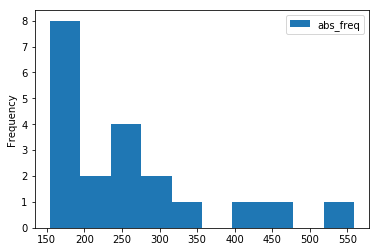

In [65]:
# 17 plot the top 20 results above as a histogram: 
word_count_df.head(20).plot(kind='hist')

What can you tell from this historgram? What do EDM researchers seem to care about?

You can tell that EDM researchers care a lot about learning, data and their students (unsurprising!)

What are improvements you could add to our data cleaning process? Write at least three things:

1. You could look at the data to find more words that aren't so useful and delete them - for example the equals sign isn't too useful here.
2. You could try to group like-words, for example words that are plurals of the same word like student/students.
3. You could check if there are 'outlier' papers. 
4. You could group words by theme. 

# Count word frequencies per paper

While the previous section gave us an overall description of the word frequency for all the papers, it would be interesting to look at each individual paper. This is what we are going to do below, by focusing on the top 30 terms used.

In [66]:
# 18) save the top 30 words from the dataframe above 
# in a new variable called "top_words"

top_words = word_count_df.head(30).index
top_words

Index(['learning', 'data', 'students', 'each', 'model', 'more', 'student',
       'using', 'used', 'performance', 'between', 'number', 'two', 'based',
       'set', 'different', 'features', 'results', 'educational', 'analysis',
       'time', 'table', 'mind', 'work', 'models', 'use', 'figure', 'course',
       'knowledge', 'questions'],
      dtype='object')

In [67]:
# 19) We are now going to construct a new dataframe where each row is a paper, 
# each column is one of the top 30 words used and each cell is a count of this word. 
# NOTE: make sure you add another field called "text" where you're going to store the 
# actual text of the paper. 
# Hint: build a list of dataframes (one for each papers), 
# and use the concat function from pandas to concatenate them!
d = []
for text in text_list:
    dic = {}
    dic['text'] = text
    for word in top_words:
        dic[word]=0
        for words in text.split():
            if word == words:
                dic[word]+=1
    d.append(dic)
        
# word_freq = defaultdict(int)

# for text in text_list:
#     for word in text.split():
#         word_freq[word] += 1

# word_count_df = pd.DataFrame.from_dict(word_freq, orient='index') \
# .sort_values(0, ascending=False) \
# .rename(columns={0: 'abs_freq'})
        
#     # iterate through the top words, add counts to the dictionary
#     # and append the results to the list above (d)

# # concatenate the list d into a dataframe
d=pd.DataFrame(d)
d.head()

,analysis,based,between,course,data,different,each,educational,features,figure,...,student,students,table,text,time,two,use,used,using,work
0,12,46,23,43,158,44,60,14,40,26,...,39,16,16,\n\n55\n\n toward the automatic labeling of co...,27,37,23,62,59,25
1,5,7,9,55,21,10,11,9,0,9,...,40,29,9,\n\n47\n\n grade prediction with temporal cour...,5,14,3,0,15,3
2,26,1,5,0,5,3,19,4,0,10,...,0,0,5,\n\n127\n\n assessing computer literacy of adu...,9,0,14,6,17,1
3,7,30,46,0,11,20,23,5,28,5,...,23,26,6,\n\n79\n\n predicting short- and long-term voc...,7,17,5,41,37,3
4,11,2,8,4,32,4,20,18,28,5,...,16,27,17,\n\n87\n\n generalizability of face-based mind...,4,7,10,23,30,23


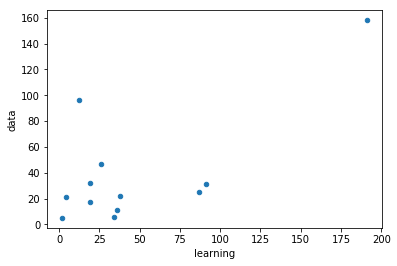

In [68]:
# 20) create a scatter plot of the words 'learning' and 'data'
# what can you say from it?
d.plot(kind='scatter', x='learning', y='data')




You can't say a lot from this scatter plot! THere's one outlier that says data and learning a lot of times!  

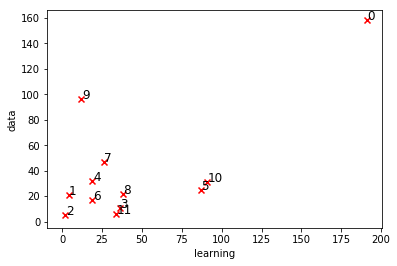

In [69]:
# 21) annotate each point with the index number of the dataframe
# hint: https://www.pythonmembers.club/2018/05/08/matplotlib-scatter-plot-annotate-set-text-at-label-each-point/

# #d.plot(kind='scatter', x='learning', y='data')
# plt.scatter(d['learning'],d['data'],marker='x',color='red')
# plt.text(x+0.3, y+0.3, 'hello', fontsize=9)


for i,type in enumerate(d['learning']):
    x = d['learning'][i]
    y = d['data'][i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.3, y+0.3, i, fontsize=12)
plt.xlabel('learning')
plt.ylabel('data')
plt.show()

#### 22) what are the two extreme papers, 
##### i.e., papers with more occurences for each term on each axis?
Paper 0 is an extreme,and paper 9 also seems to be an outlier.


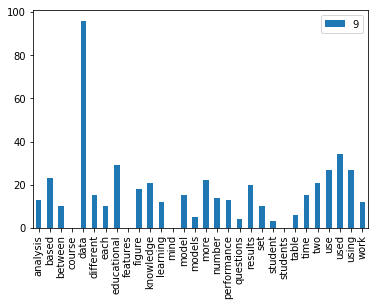

In [70]:
# 23) plot the histogram of the paper that had high counts of "data"
# hint: https://stackoverflow.com/questions/52392728/create-a-histogram-based-on-one-row-of-a-dataframe
d_extreme = pd.DataFrame(d.iloc[9])
d_extreme.head()
d_extreme= d_extreme.drop('text')
d_extreme.plot.bar()



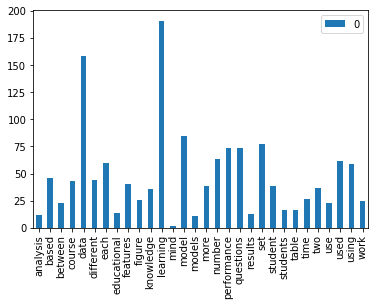

In [71]:
# 24) plot the histogram of the paper that had high counts of "learning"
d_extreme = pd.DataFrame(d.iloc[0])
d_extreme.head()
d_extreme= d_extreme.drop('text')
d_extreme.plot.bar()

# 25) what can you observe? 
these papers must be writing about something called 'data' or 'learning'

In [72]:
# 26) print the first 1000 characters of each paper. 
print(d.iloc[0]['text'][:1000])
print(print(d.iloc[9]['text'][:1000]))


# Is your interpretation confirmed?
# well yes - these words were in each of the papers' titles. 



55

toward the automatic labeling of course questions for
ensuring their alignment with learning outcomes
s. supraja

kevin hartman

sivanagaraja tatinati

andy w. h. khong

nanyang technological
university
50 nanyang ave
singapore 639798
ssupraja001@e.ntu.edu.sg

nanyang technological
university
50 nanyang ave
singapore 639798
khartman@ntu.edu.sg

nanyang technological
university
50 nanyang ave
singapore 639798
tatinati@ntu.edu.sg

nanyang technological
university
50 nanyang ave
singapore 639798
andykhong@ntu.edu.sg

abstract
expertise in a domain of knowledge is characterized by a greater
fluency for solving problems within that domain and a greater
facility for transferring the structure of that knowledge to other
domains. deliberate practice and the feedback that takes place
during practice activities serve as gateways for developing domain
expertise. however, there is a difficulty in consistently aligning
feedback about a learner’s practice performance with the intended
learnin

# Regex

In this section we are going to work with Regex formulas to extract part of the paper. 

In [79]:
# 27) we are going to work on the first paper to make sure that our 
# regex works. Just retrieve the text and assign it to a variable below
with open('Papers/paper0.txt', 'r') as myfile:
  data = myfile.read()

import re

In [95]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203
# abstract = re.findall ( 'abstract', data, re.DOTALL)
# print(abstract[0])
# introduction = re.findall('introduction',data,re.DOTALL)
# print(introduction[0])

m = re.findall('abstract(.*?)introduction', data, re.DOTALL)
m
# <!--(.*?)-->'

['\nmind wandering, defined as shifts in attention from task-related\nprocessing to task-unrelated thoughts, is a ubiquitous\nphenomenon that has a negative influence on performance and\nproductivity in many contexts, including learning. we propose\nthat next-generation learning technologies should have some\nmechanism to detect and respond to mind wandering in real-time.\ntowards this end, we developed a technology that automatically\ndetects mind wandering from eye-gaze during learning from\ninstructional texts. when mind wandering is detected, the\ntechnology intervenes by posing just-in-time questions and\nencouraging re-reading as needed. after multiple rounds of\niterative refinement, we summatively compared the technology to\na yoked-control in an experiment with 104 participants. the key\ndependent variable was performance on a post-reading\ncomprehension assessment. our results suggest that the\ntechnology was successful in correcting comprehension deficits\nattributed to mind

In [87]:
# 29) find the text between the words 'abstract' and 
# 'introduction' for the first paper using the .index() function

start = data.find('abstract')
end = data.find('introduction', start)
data[start:end]



'abstract\nmind wandering, defined as shifts in attention from task-related\nprocessing to task-unrelated thoughts, is a ubiquitous\nphenomenon that has a negative influence on performance and\nproductivity in many contexts, including learning. we propose\nthat next-generation learning technologies should have some\nmechanism to detect and respond to mind wandering in real-time.\ntowards this end, we developed a technology that automatically\ndetects mind wandering from eye-gaze during learning from\ninstructional texts. when mind wandering is detected, the\ntechnology intervenes by posing just-in-time questions and\nencouraging re-reading as needed. after multiple rounds of\niterative refinement, we summatively compared the technology to\na yoked-control in an experiment with 104 participants. the key\ndependent variable was performance on a post-reading\ncomprehension assessment. our results suggest that the\ntechnology was successful in correcting comprehension deficits\nattributed 

In [99]:
# 30) add a new column namd "abstract" to the dataframe above 
# and initialize it with an empty string
d['abstract']=''


In [126]:
# now add the abstracts to each row of the dataframe using either
# of the two methods above
# Hint: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
# for index, row in df.iterrows():
#     print(row['c1'], row['c2'])
# for row in d:
    
# row = d.iterrows()
# print(row['int_column'].dtype)

for index, row in d.iterrows():
    with open('Papers/paper'+str(index)+'.txt', 'r') as myfile:
        data = myfile.read()
    start = data.find('abstract')
    end = data.find('introduction', start)
    abstract = data[start:end]
    d['abstract'][index]= abstract
d.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,analysis,based,between,course,data,different,each,educational,features,figure,...,students,table,text,time,two,use,used,using,work,abstract
0,12,46,23,43,158,44,60,14,40,26,...,16,16,\n\n55\n\n toward the automatic labeling of co...,27,37,23,62,59,25,"abstract\nmind wandering, defined as shifts in..."
1,5,7,9,55,21,10,11,9,0,9,...,29,9,\n\n47\n\n grade prediction with temporal cour...,5,14,3,0,15,3,abstract\neducational systems typically contai...
2,26,1,5,0,5,3,19,4,0,10,...,0,5,\n\n127\n\n assessing computer literacy of adu...,9,0,14,6,17,1,abstract\n\nmassive open online courses (moocs...
3,7,30,46,0,11,20,23,5,28,5,...,26,6,\n\n79\n\n predicting short- and long-term voc...,7,17,5,41,37,3,abstract\nreplayability has long been touted a...
4,11,2,8,4,32,4,20,18,28,5,...,27,17,\n\n87\n\n generalizability of face-based mind...,4,7,10,23,30,23,abstract\nthere is a critical need to develop ...


In [129]:
# 31) print your abstracts (they should contain a lot of \n = carriage return)
for index, row in d.iterrows():
    print('Paper ' + str(index)+ ' '+d['abstract'][index])

Paper 0 abstract
mind wandering, defined as shifts in attention from task-related
processing to task-unrelated thoughts, is a ubiquitous
phenomenon that has a negative influence on performance and
productivity in many contexts, including learning. we propose
that next-generation learning technologies should have some
mechanism to detect and respond to mind wandering in real-time.
towards this end, we developed a technology that automatically
detects mind wandering from eye-gaze during learning from
instructional texts. when mind wandering is detected, the
technology intervenes by posing just-in-time questions and
encouraging re-reading as needed. after multiple rounds of
iterative refinement, we summatively compared the technology to
a yoked-control in an experiment with 104 participants. the key
dependent variable was performance on a post-reading
comprehension assessment. our results suggest that the
technology was successful in correcting comprehension deficits
attributed to mind wa

In [157]:
d['abstract']



0     abstractmind wandering, defined as shifts in a...
1     abstracteducational systems typically contain ...
2     abstractmassive open online courses (moocs) ha...
3     abstractreplayability has long been touted as ...
4     abstractthere is a critical need to develop ne...
5     abstractexpertise in a domain of knowledge is ...
6     abstractwe show how the novel use of a semanti...
7     abstractwe investigate generalizability of fac...
8     abstractwe present results of a randomized con...
9     abstractthis study investigates a possible way...
10    abstractin this paper, we investigate the rela...
11    abstractadaptive learning technologies hold gr...
Name: abstract, dtype: object

In [156]:
# 32) clean the abstract column using the "apply" function with a lambda

d['abstract']= d.abstract.apply(lambda x: str(x))
d['abstract']

0     abstractmind wandering, defined as shifts in a...
1     abstracteducational systems typically contain ...
2     abstractmassive open online courses (moocs) ha...
3     abstractreplayability has long been touted as ...
4     abstractthere is a critical need to develop ne...
5     abstractexpertise in a domain of knowledge is ...
6     abstractwe show how the novel use of a semanti...
7     abstractwe investigate generalizability of fac...
8     abstractwe present results of a randomized con...
9     abstractthis study investigates a possible way...
10    abstractin this paper, we investigate the rela...
11    abstractadaptive learning technologies hold gr...
Name: abstract, dtype: object

## Comparing documents using TF-IDF

In [158]:
# 33) now we are going to do something a little more advanced:'
# we are going to compute the similarity between two texts
# using a method called tf-idf (we'll talk more about it later)
# Hint: https://stackoverflow.com/questions/43631533/similarity-between-two-text-documents-in-python
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


34) What can you observe?

In [27]:
# 35) repeat the same procedure with the entire papers


In [28]:
# 36) What are two documents that seem to be very similar?
# print their abstract: 
# print the first 1000 characters of each paper. 


In [66]:
# 37) what seems to be similar between them? 

# they both talk about analyzing questions and answers from students

## Free exploration (Optional)

- try to extract the names of the author
- find a way to get the top words shared across two texts
- use a regex (or any other method) to get the list of references